In [26]:
# Dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



In [27]:
# Load CSV
url = os.path.join("..", "Datasets", "Annual metropolitan train station entries 2018-2022.csv")
# Read and display with pandas
df = pd.read_csv(url)
df

,Fin_year,Stop_ID,Stop_name,Stop_lat,Stop_long,Pax_annual,Pax_weekday,Pax_norm_weekday,Pax_sch_hol_weekday,Pax_Saturday,Pax_Sunday,Pax_pre_AM_peak,Pax_AM_peak,Pax_interpeak,Pax_PM_peak,Pax_PM_late
0,FY18-19,19827,Stony Point,-38.374235,145.221837,5400,50,50,50,50,50,50,50,50,50,50
1,FY18-19,19828,Crib Point,-38.366123,145.204043,17900,50,50,50,150,100,50,50,50,50,50
2,FY18-19,19829,Morradoo,-38.354033,145.189603,5650,50,50,50,50,50,50,50,50,50,50
3,FY18-19,19830,Bittern,-38.337390,145.178026,14800,50,50,50,50,50,50,50,50,50,50
4,FY18-19,19831,Hastings,-38.305659,145.185980,21900,50,50,50,50,50,50,50,50,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,FY21-22,19908,Richmond,-37.824074,144.990164,1966800,4650,4750,4300,7350,5750,100,550,700,2100,1250
884,FY21-22,19973,North Melbourne,-37.806310,144.941510,703500,2150,2250,1850,1750,1250,50,350,500,1100,200
885,FY21-22,19979,Jolimont,-37.816527,144.984098,473600,950,1050,800,1950,1650,50,100,150,450,300
886,FY21-22,22180,Southern Cross,-37.817936,144.951411,6187150,19350,19900,17350,12800,10250,350,1500,3850,11650,2550


In [28]:
# Create a new DataFrame containing only the entries during peak hours
peak_hours = df.loc[:, ["Fin_year","Stop_name", "Pax_pre_AM_peak","Pax_AM_peak", "Pax_PM_peak", "Pax_PM_late"]]
peak_hours

,Fin_year,Stop_name,Pax_pre_AM_peak,Pax_AM_peak,Pax_PM_peak,Pax_PM_late
0,FY18-19,Stony Point,50,50,50,50
1,FY18-19,Crib Point,50,50,50,50
2,FY18-19,Morradoo,50,50,50,50
3,FY18-19,Bittern,50,50,50,50
4,FY18-19,Hastings,50,50,50,50
...,...,...,...,...,...,...
883,FY21-22,Richmond,100,550,2100,1250
884,FY21-22,North Melbourne,50,350,1100,200
885,FY21-22,Jolimont,50,100,450,300
886,FY21-22,Southern Cross,350,1500,11650,2550


In [29]:
# Grouping the data by financial year and resetting index
peak_hours_grouped = peak_hours.groupby("Fin_year").agg({
    "Pax_pre_AM_peak": "sum",
    "Pax_AM_peak": "sum",
    "Pax_PM_peak": "sum",
    "Pax_PM_late": "sum"
}).reset_index()
peak_hours_grouped

,Fin_year,Pax_pre_AM_peak,Pax_AM_peak,Pax_PM_peak,Pax_PM_late
0,FY18-19,52600,233200,300800,71250
1,FY19-20,42700,180600,231800,52700
2,FY20-21,19000,62450,91400,24850
3,FY21-22,21450,79050,114100,30550


In [30]:
# Checking the datatype of the "peak_hours_grouped" Dataframe
print(peak_hours_grouped.dtypes)

Fin_year           object
Pax_pre_AM_peak     int64
Pax_AM_peak         int64
Pax_PM_peak         int64
Pax_PM_late         int64
dtype: object


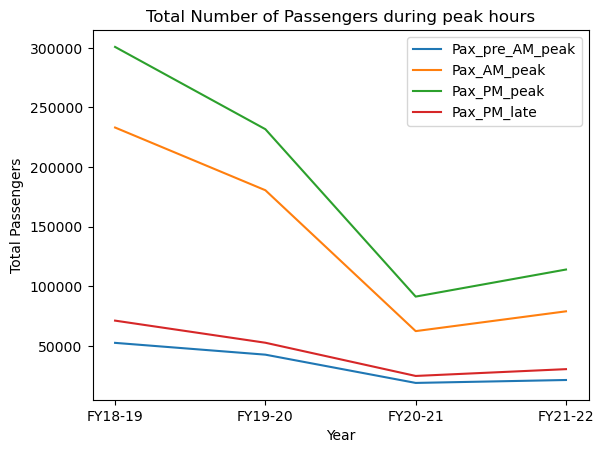

In [31]:
#Line Plot
plt.plot(peak_hours_grouped["Fin_year"], peak_hours_grouped["Pax_pre_AM_peak"], label="Pax_pre_AM_peak")
plt.plot(peak_hours_grouped["Fin_year"], peak_hours_grouped["Pax_AM_peak"], label="Pax_AM_peak")
plt.plot(peak_hours_grouped["Fin_year"], peak_hours_grouped["Pax_PM_peak"], label="Pax_PM_peak")
plt.plot(peak_hours_grouped["Fin_year"], peak_hours_grouped["Pax_PM_late"], label="Pax_PM_late")
plt.legend()
plt.title("Total Number of Passengers during peak hours")
plt.xlabel("Year")
plt.ylabel("Total Passengers")
# Save and show the visualisation
plt.savefig("../Visualisations/Q4-1.jpg")
plt.show()

In [32]:
# Save the visualisation
plt.savefig("../Visualisations/Q4-1.jpg")


<Figure size 640x480 with 0 Axes>

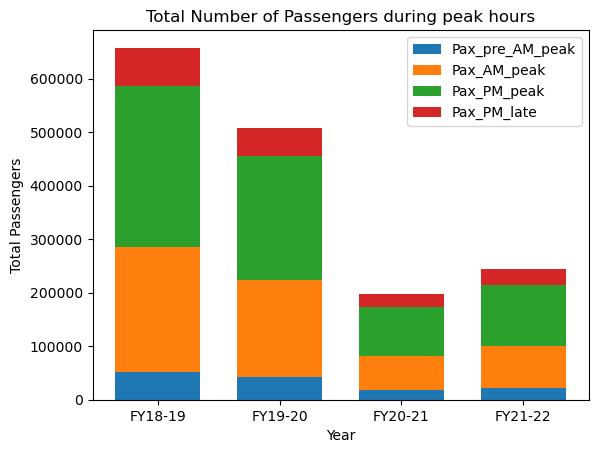

In [33]:
# Create stacked bar graph
labels = peak_hours_grouped["Fin_year"].tolist()
x = np.arange(len(labels))
width = 0.7

fig, ax = plt.subplots()

p1 = ax.bar(x, peak_hours_grouped["Pax_pre_AM_peak"], width, label="Pax_pre_AM_peak")
p2 = ax.bar(x, peak_hours_grouped["Pax_AM_peak"], width, bottom=peak_hours_grouped["Pax_pre_AM_peak"], label="Pax_AM_peak")
p3 = ax.bar(x, peak_hours_grouped["Pax_PM_peak"], width, bottom=peak_hours_grouped["Pax_AM_peak"]+peak_hours_grouped["Pax_pre_AM_peak"], label="Pax_PM_peak")
p4 = ax.bar(x, peak_hours_grouped["Pax_PM_late"], width, bottom=peak_hours_grouped["Pax_PM_peak"]+peak_hours_grouped["Pax_AM_peak"]+peak_hours_grouped["Pax_pre_AM_peak"], label="Pax_PM_late")

ax.set_title("Total Number of Passengers during peak hours")
ax.set_xlabel("Year")
ax.set_ylabel("Total Passengers")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



In [34]:
plt.savefig("../Visualisations/Q4-2.jpg")

<Figure size 640x480 with 0 Axes>

In [35]:
# Null Hypothesis: The pandemic did not affect the peak hours of train usage in Metropolitan Melbourne 
# Alternative Hypothesis: The pandemic did affect the peak hours of train usage in Metropolitan Melbourne 

# Perform hypothesis testing on the mean values of the "Pax_pre_AM_peak", "Pax_AM_peak", "Pax_PM_peak", and "Pax_PM_late" columns
alpha = 0.05  # Set the significance level
pre_am_peak = peak_hours_grouped["Pax_pre_AM_peak"]
am_peak = peak_hours_grouped["Pax_AM_peak"]
pm_peak = peak_hours_grouped["Pax_PM_peak"]
pm_late = peak_hours_grouped["Pax_PM_late"]
# Perform one-way ANOVA
f_val, p_val = st.f_oneway(pre_am_peak, am_peak, pm_peak, pm_late)
print("\nOne-way ANOVA Test:")
print("F-value:", f_val)
print("p-value:", p_val)
if p_val < alpha:
    print("Reject the null hypothesis that the means are equal.")
else:
    print("Fail to reject the null hypothesis that the means are equal.")


One-way ANOVA Test:
F-value: 4.978036646608243
p-value: 0.01801567492589464
Reject the null hypothesis that the means are equal.
